In [1]:
#we will be testing the following:
#Classification:
#-logistic regression
#-random forest
#-dense Neural Network

#Regression:
#-linear regression
#-random forest
#-dense Neural Network

#dependencies
import pandas as pd
import numpy as np
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#import dependencies for neural network regressor and classifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
#load data, split into training and testing
classification_set = pd.read_csv("./classification_set.csv",index_col=0)
regression_set = pd.read_csv("./regression_set.csv",index_col=0)

classification_set.head()
regression_set.head()

X_c = classification_set[classification_set.columns[:-1]]
y_c = classification_set[classification_set.columns[-1]]

X_r = regression_set[regression_set.columns[:-1]]
y_r = regression_set[regression_set.columns[-1]]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=.2, random_state=42)

In [16]:
#define parameters, constants
#i, the ith row to explain
i = 20
#Neural Network hyper parameters
activation_function = "logistic"
alpha = 0.01

In [17]:
#Creating LIME explanation instances for regression and classification
explainer_c = lime_tabular.LimeTabularExplainer(np.array(X_train_c), 
                                                mode="classification", 
                                                class_names = [0, 1, 2],
                                                feature_names=X_c.columns, 
                                                random_state=42)

explainer_r = lime_tabular.LimeTabularExplainer(np.array(X_train_r), 
                                                mode="regression", 
                                                feature_names=X_r.columns, 
                                                random_state=42)

# Classification comparisons
* Logistic Regression
* RandomForestClassifier
* Neural Network Classification

/Users/jeremyjang/opt/anaconda3/envs/introds/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


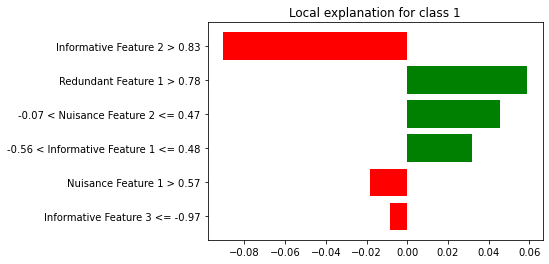

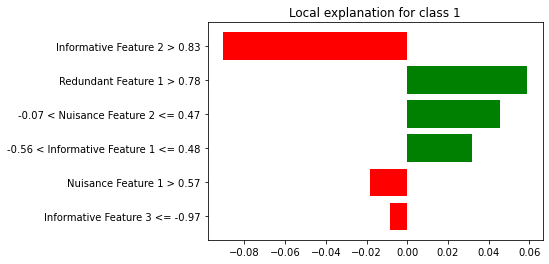

In [18]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_c, y_train_c)

logreg

example_explanation_logreg = explainer_c.explain_instance(X_test_c.iloc[i], logreg.predict_proba, num_features=7, num_samples=10)
example_explanation_logreg.as_pyplot_figure()

In [23]:
y_pred = logreg.predict(X_test_c)
print(y_pred[i], y_test_c.iloc[i])

1 2


/Users/jeremyjang/opt/anaconda3/envs/introds/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


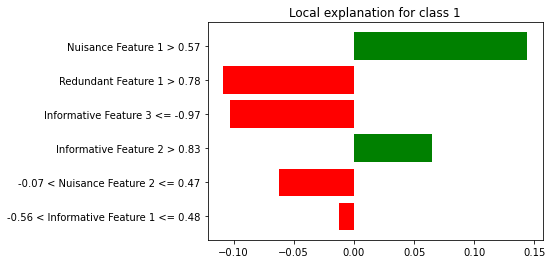

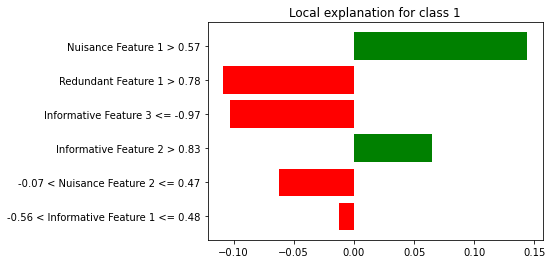

In [25]:
#random forest
rand_forest_c = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=6)
rand_forest_c.fit(X_train_c, y_train_c)

example_explanation_rfc = explainer_c.explain_instance(X_test_c.iloc[i], rand_forest_c.predict_proba, num_features=7, num_samples=10)
example_explanation_rfc.as_pyplot_figure()

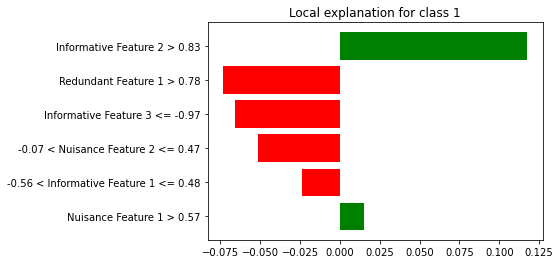

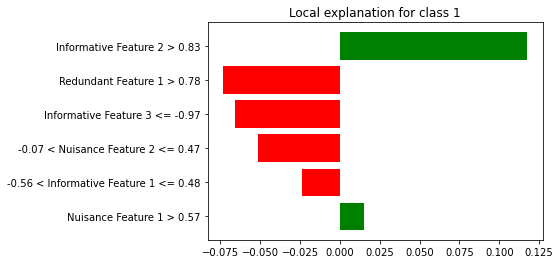

In [27]:
#Neural Network Classifier

#scale training data first
scaler = StandardScaler()

X_c_scaled = scaler.fit_transform(X_c)
X_train_c_scaled, X_test_c_scaled, y_train_c_scaled, y_test_c_scaled = train_test_split(X_c_scaled, y_c, test_size=.2, random_state=42)
nn_clf = MLPClassifier(hidden_layer_sizes=(3,4,3), solver='lbfgs', max_iter=10000, random_state=0)
nn_clf.fit(X_train_c_scaled, y_train_c_scaled)

example_explanation_nnc = explainer_c.explain_instance(X_test_c_scaled[i], nn_clf.predict_proba, num_features=7, num_samples=10)
example_explanation_nnc.as_pyplot_figure()

# Regression comparisons
* Linear Regression
* RandomForestRegressor
* Neural Network Regressor

/Users/jeremyjang/opt/anaconda3/envs/introds/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


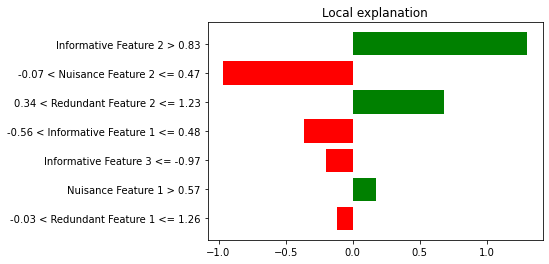

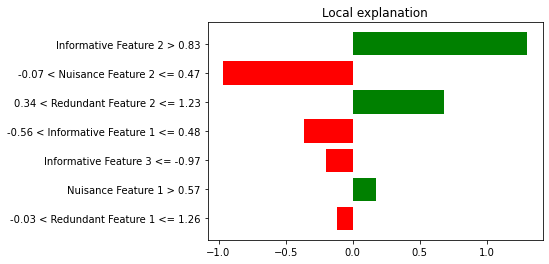

In [28]:
#linear regression
linreg = LinearRegression()
linreg.fit(X_train_r, y_train_r)

example_explanation_linreg = explainer_r.explain_instance(X_test_r.iloc[i], linreg.predict, num_features=7, num_samples=10)
example_explanation_linreg.as_pyplot_figure()

/Users/jeremyjang/opt/anaconda3/envs/introds/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


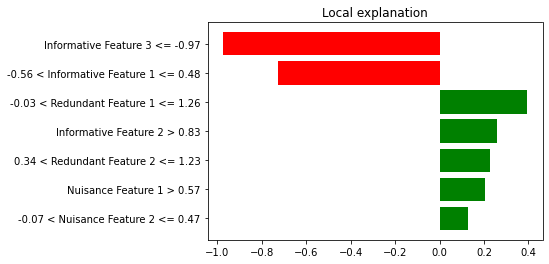

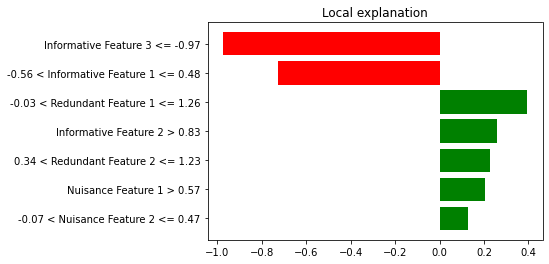

In [29]:
#random forest
rand_forest_r = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=6)
rand_forest_r.fit(X_train_r, y_train_r)

example_explanation_rfr = explainer_r.explain_instance(X_test_r.iloc[i], rand_forest_r.predict, num_features=7, num_samples=10)
example_explanation_rfr.as_pyplot_figure()

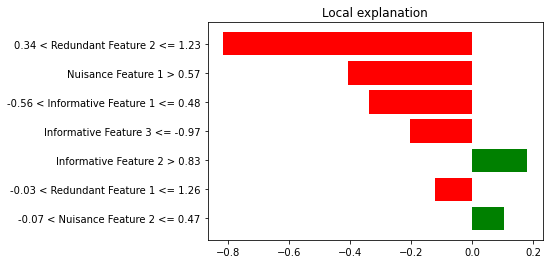

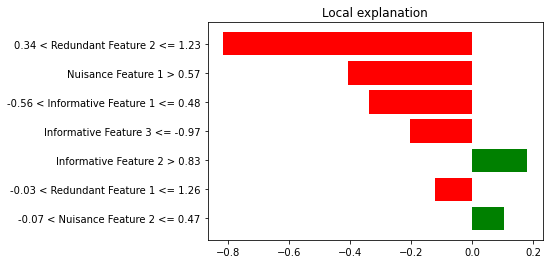

In [30]:
#neural network regressor
X_r_scaled = scaler.fit_transform(X_r)
X_train_r_scaled, X_test_r_scaled, y_train_r_scaled, y_test_r_scaled = train_test_split(X_r_scaled, y_r, test_size=.2, random_state=42)
nn_reg = MLPRegressor(hidden_layer_sizes=(3,4,3), solver='lbfgs', max_iter=10000, random_state=0)
nn_reg.fit(X_train_r_scaled, y_train_r_scaled)

example_explanation_nnr = explainer_r.explain_instance(X_test_r.iloc[i], nn_reg.predict, num_features=7, num_samples=10)
example_explanation_nnr.as_pyplot_figure()